In [1]:
# ================================
# 0) Imports e configurações gerais
# ================================
# Librarias necessárias
# Libs para manipulação de dados
import pandas as pd
import numpy as np

# Libs graficas ou de Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libs para Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import joblib

# ler dados corretamente
import unicodedata

# Avisos
# Função warnings.filterwarnings("ignore") Para evitar o Warning () avisos
import warnings
warnings.filterwarnings('ignore')

# Configuração no pandas
# Função pandas.set_option() para ajuste de linhas e colunas no () Parâmetros  (pat, valor)
# pat: Regexp que deve corresponder a uma única opção.
# valor: Novo valor da opção.
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

# Configuração no Matplotlib
# Função plt.rcParams['figure.figsize'] = (12, 6) para ajustar o tamanho padrão
# Função plt.style.use('seaborn-darkgrid') para ajustar o estilo dos gráficos
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_theme(style="darkgrid", context="notebook")  # substitui o antigo 'seaborn-darkgrid'

# Para garantir reprodutibilidade dos resultados
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

## 1. Introdução
Este projeto busca prever o faturamento em novos bairros do Rio de Janeiro com base em características sociodemográficas.  
Além disso, busca identificar quais variáveis influenciam mais no faturamento.

**Exploração dos Dados**

In [2]:
# =====================================
# 1) Carregar os dados no Google Colab
# =====================================
# 1ª Opção: ler direto do arquivo no ambiente
# Lendo os dados
# Função de leitura da base de dados importada no colab Base_Dados = pd.read_csv () entre (o nome do arquivo)

# Normalizar nomes de colunas para evitar problemas com acentos/maiúsculas
def normalize_colname(c):
    c = c.strip()  # remove espaços extras
    c = unicodedata.normalize("NFKD", c).encode("ascii", "ignore").decode("utf-8")  # remove acentos
    c = c.lower().replace(" ", "_")
    return c

Base_Dados = pd.read_csv('DesafioEstagioMachineLearning.csv')
Base_Dados.columns = [normalize_colname(c) for c in Base_Dados.columns]
print(Base_Dados.columns.tolist())
# 2ª Opção B (alternativa): subir do seu computador
# from google.colab import files
# uploaded = files.upload()
# CSV_PATH = list(uploaded.keys())[0]

# Dimensão
# A a função Python NumPy numpy.shape() encontra a forma de um array.
# Por shape, queremos dizer que ajuda a encontrar as dimensões de um array.
# Retorna a forma sob a forma de um tuple porque não podemos alterar um tuple tal como não podemos alterar as dimensões de um array.
Base_Dados.shape

['codigo', 'nome', 'cidade', 'estado', 'populacao', 'popate9', 'popde10a14', 'popde15a19', 'popde20a24', 'popde25a34', 'popde35a49', 'popde50a59', 'popmaisde60', 'domiciliosa1', 'domiciliosa2', 'domiciliosb1', 'domiciliosb2', 'domiciliosc1', 'domiciliosc2', 'domiciliosd', 'domiciliose', 'rendamedia', 'faturamento']


(160, 23)

In [3]:
# Correção
Base_Dados = pd.read_csv("DesafioEstagioMachineLearning.csv", encoding="latin1")

# Corrigir nomes de colunas
Base_Dados.rename(columns={"populaÃ§Ã£o": "populacao"}, inplace=True)

## 2. Exploração dos Dados (EDA)
### 2.1 Estrutura do Dataset
- Número de linhas e colunas.
- Tipos de variáveis.
- Verificação de valores ausentes.

In [4]:
# Verificar
# A função head() exibe as linhas iniciais da base de dados, se nenhum valor for informado, esta função vai exibir as cinco primeiras linhas.
print("Dimensão:", Base_Dados.shape)
Base_Dados.head()

Dimensão: (160, 23)


,codigo,nome,cidade,estado,populacao,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
0,3304557060,AboliÃ§Ã£o,Rio de Janeiro,RJ,11676,1027,483,688,800,1675,2300,1784,2919,0,145,715,1242,1093,758,92,304,2501.0,932515.0
1,3304557138,Acari,Rio de Janeiro,RJ,27564,5131,2188,2697,2630,4810,5308,2403,2397,0,0,82,506,2040,2490,827,2506,931.0,588833.0
2,3304557057,Ãgua Santa,Rio de Janeiro,RJ,9003,883,399,597,762,1755,2076,1112,1419,0,96,404,652,644,522,77,254,2391.0,874200.0
3,3304557031,Alto Da Boa Vista,Rio de Janeiro,RJ,9606,1072,538,660,685,1317,2007,1341,1986,114,178,393,517,945,584,137,286,3727.0,912226.0
4,3304557125,Anchieta,Rio de Janeiro,RJ,57222,7677,3774,4892,4600,8660,12272,7157,8190,0,0,1089,2821,5110,5422,1073,3261,1380.0,553020.0


In [5]:
# Campos unicos
# A função Nunique, por outro lado, conta os valores distintos das colunas. Os valores NaN podem ser ignorados.
# Isso mostra apenas o número de categorias diferentes presentes em uma coluna de um dataframe.
Base_Dados.nunique()

,0
codigo,160
nome,160
cidade,1
estado,1
populacao,159
popAte9,159
popDe10a14,159
popDe15a19,156
popDe20a24,158
popDe25a34,160


In [6]:
# Tipos das colunas
# A função Pandas dataframe.info() é usada para obter um resumo conciso do dataframe, é muito útil para identificar dados NaN.
# Essa função aplicada sobre um dataframe, retorna uma tabela com informações de cada coluna do dataframe: quantidade de valores não NaN e tipo de dados.
print(Base_Dados.dtypes.value_counts())
Base_Dados.info()

int64      18
object      3
float64     2
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   codigo        160 non-null    int64  
 1   nome          160 non-null    object 
 2   cidade        160 non-null    object 
 3   estado        160 non-null    object 
 4   populacao     160 non-null    int64  
 5   popAte9       160 non-null    int64  
 6   popDe10a14    160 non-null    int64  
 7   popDe15a19    160 non-null    int64  
 8   popDe20a24    160 non-null    int64  
 9   popDe25a34    160 non-null    int64  
 10  popDe35a49    160 non-null    int64  
 11  popDe50a59    160 non-null    int64  
 12  popMaisDe60   160 non-null    int64  
 13  domiciliosA1  160 non-null    int64  
 14  domiciliosA2  160 non-null    int64  
 15  domiciliosB1  160 non-null    int64  
 16  domiciliosB2  160 non-null    int64  
 17  domic

In [7]:
# Tipo de colunas
# A função .dtypes nos mostra que tipo de dados cada coluna contém
Base_Dados.dtypes.value_counts()

,count
int64,18
object,3
float64,2


###2.2 Estatísticas Descritivas
(Exibir `describe()`).  

**Descrição:**  
> As variáveis apresentam diferentes escalas. O faturamento varia de X a Y, enquanto a renda média apresenta lacunas que deverão ser tratadas.

In [8]:
# Estatísticas descritivas
print("=== Estatísticas descritivas ===")
print(Base_Dados.describe())


=== Estatísticas descritivas ===
             codigo      populacao       popAte9    popDe10a14    popDe15a19  \
count  1.600000e+02     160.000000     160.00000    160.000000    160.000000   
mean   3.304557e+09   42654.350000    5329.06250   2484.443750   3272.156250   
std    4.633213e+01   64262.949072   10816.19977   4948.827166   5752.156303   
min    3.304557e+09     173.000000      33.00000     13.000000     22.000000   
25%    3.304557e+09   13362.750000    1512.75000    690.750000    945.000000   
50%    3.304557e+09   26076.000000    3111.50000   1434.000000   2015.000000   
75%    3.304557e+09   46504.500000    5622.25000   2621.500000   3448.750000   
max    3.304557e+09  667603.000000  122578.00000  55935.000000  62342.000000   

         popDe20a24    popDe25a34     popDe35a49    popDe50a59   popMaisDe60  \
count    160.000000    160.000000     160.000000    160.000000    160.000000   
mean    3349.381250   6584.475000    8826.862500   5332.262500   7475.706250   
std   

In [9]:
# Contagem de valores nulos
print("\n=== Contagem de valores nulos ===")
print(Base_Dados.isna().sum())


=== Contagem de valores nulos ===
codigo          0
nome            0
cidade          0
estado          0
populacao       0
popAte9         0
popDe10a14      0
popDe15a19      0
popDe20a24      0
popDe25a34      0
popDe35a49      0
popDe50a59      0
popMaisDe60     0
domiciliosA1    0
domiciliosA2    0
domiciliosB1    0
domiciliosB2    0
domiciliosC1    0
domiciliosC2    0
domiciliosD     0
domiciliosE     0
rendaMedia      6
faturamento     0
dtype: int64


### 2.3 Distribuição das Variáveis (Histogramas)
(Gráficos de histograma para renda, população, faturamento etc).  

**Descrição:**  
> Observa-se que a maioria dos bairros possui faturamento concentrado em uma faixa inferior, com alguns casos extremos de alto faturamento.

**Exploração Analítica (EDA)**

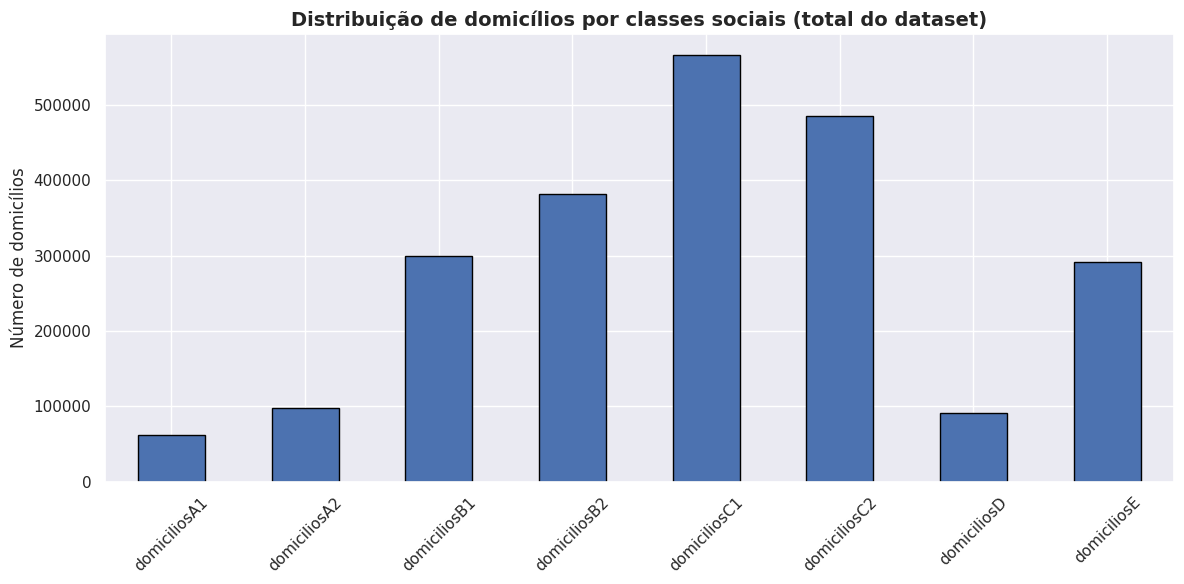

In [10]:
# --- 2.1 Domicílios por classes sociais
# Distribuição da população por faixas etárias

classes = ["domiciliosA1","domiciliosA2","domiciliosB1","domiciliosB2",
           "domiciliosC1","domiciliosC2","domiciliosD","domiciliosE"]
classes_exist = [c for c in classes if c in Base_Dados.columns]

if classes_exist:
    domicilios = Base_Dados[classes_exist].sum().sort_index()
    plt.figure()
    domicilios.plot(kind="bar", edgecolor="black")
    plt.title("Distribuição de domicílios por classes sociais (total do dataset)", fontsize=14, fontweight="bold")
    plt.ylabel("Número de domicílios")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

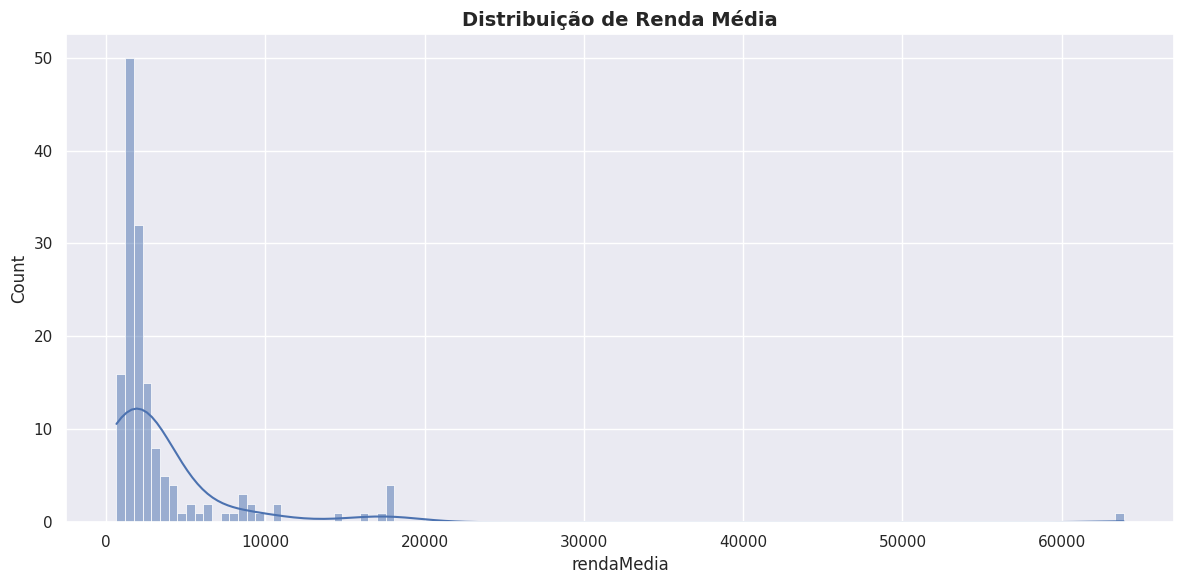

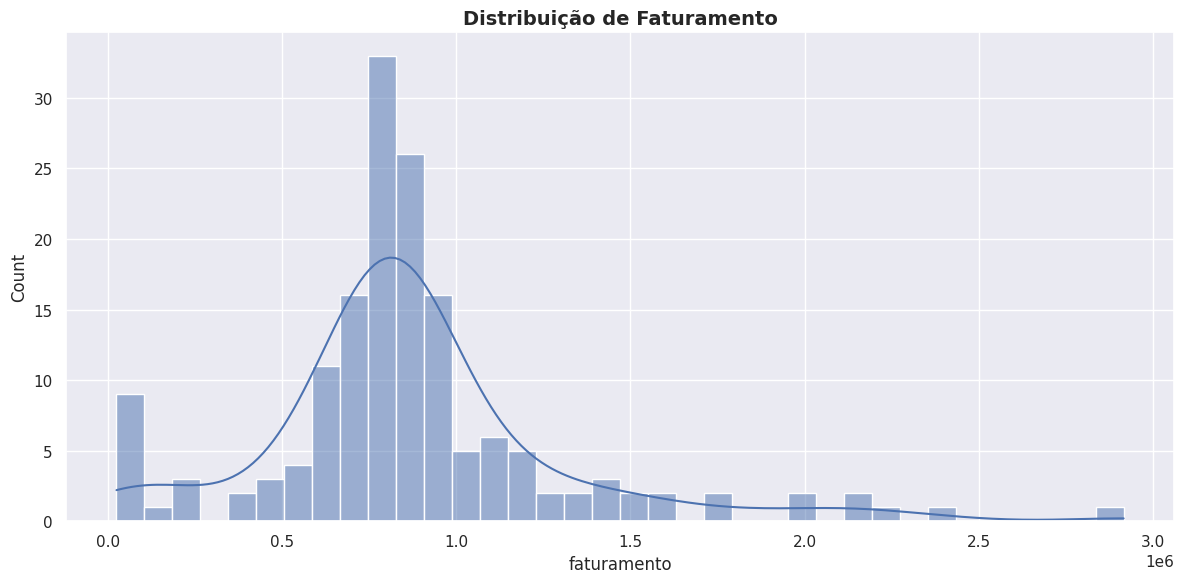

In [11]:
# --- 2.2 Distribuição de renda e faturamento
for col in ["rendaMedia", "faturamento"]:
    if col in Base_Dados.columns:
        plt.figure()
        sns.histplot(Base_Dados[col].dropna(), kde=True)
        ttl = "Renda Média" if col=="rendaMedia" else "Faturamento"
        plt.title(f"Distribuição de {ttl}", fontsize=14, fontweight="bold")
        plt.tight_layout()
        plt.show()

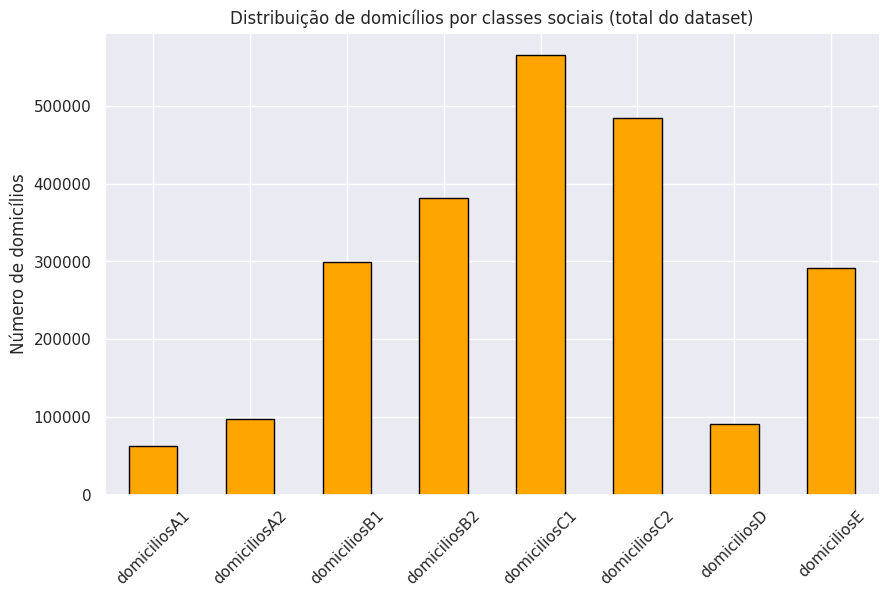

In [12]:
# --- 2.3 Distribuição de domicílios por classes sociais

classes = ["domiciliosA1","domiciliosA2","domiciliosB1","domiciliosB2",
           "domiciliosC1","domiciliosC2","domiciliosD","domiciliosE"]

domicilios = Base_Dados[classes].sum().sort_index()

plt.figure(figsize=(10,6))
domicilios.plot(kind="bar", color="orange", edgecolor="black")
plt.title("Distribuição de domicílios por classes sociais (total do dataset)")
plt.ylabel("Número de domicílios")
plt.xticks(rotation=45)
plt.show()

### 2.4 Boxplots (Detecção de Outliers)
(Boxplots para faturamento e renda).  

**Descrição:**  
> Foram identificados outliers principalmente no faturamento. Esses valores, embora extremos, são mantidos pois refletem bairros com padrões distintos de consumo.


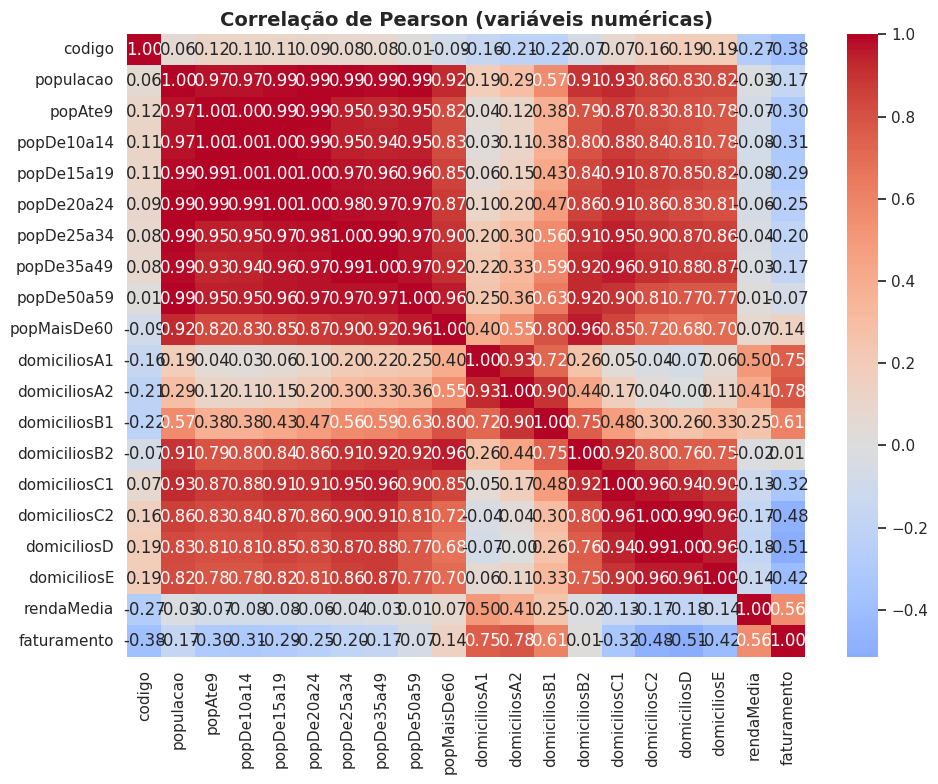

In [13]:
from scipy.stats import chi2_contingency

# --- 2.4 Correlação entre variáveis numéricas (Pearson)
num_cols = Base_Dados.select_dtypes(include=np.number).columns
if len(num_cols) > 1:
    corr_pearson = Base_Dados[num_cols].corr(method="pearson")

    plt.figure(figsize=(10,8))
    sns.heatmap(corr_pearson, annot=True, cmap="coolwarm", fmt=".2f", center=0)
    plt.title("Correlação de Pearson (variáveis numéricas)", fontsize=14, fontweight="bold")
    plt.tight_layout()
    plt.show()

# --- Função para Cramér’s V (associação entre categóricas)
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - (k-1)*(r-1)/(n-1))
    rcorr = r - (r-1)**2/(n-1)
    kcorr = k - (k-1)**2/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

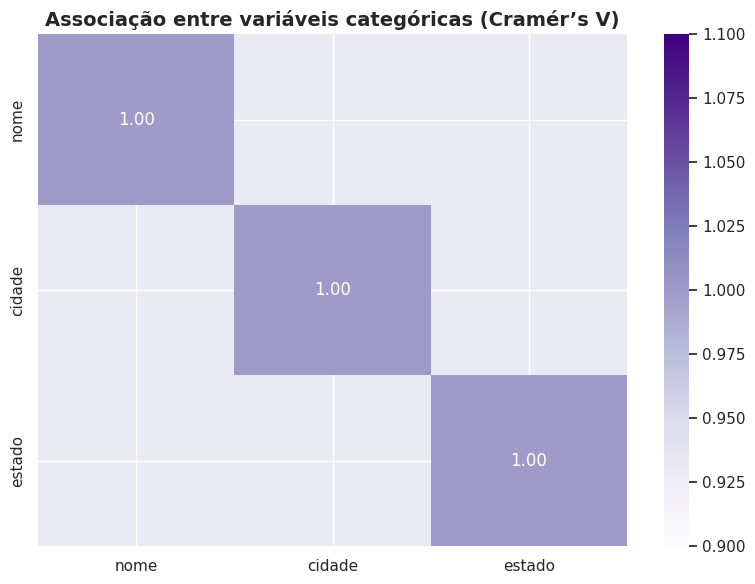

In [14]:
# --- 2.5 Associação entre variáveis categóricas (Cramér’s V)
cat_cols = Base_Dados.select_dtypes(exclude=np.number).columns
if len(cat_cols) > 1:
    cramers_results = pd.DataFrame(index=cat_cols, columns=cat_cols, dtype=float)
    for col1 in cat_cols:
        for col2 in cat_cols:
            if col1 != col2:
                cramers_results.loc[col1, col2] = cramers_v(Base_Dados[col1], Base_Dados[col2])
            else:
                cramers_results.loc[col1, col2] = 1.0

    plt.figure(figsize=(8,6))
    sns.heatmap(cramers_results.astype(float), annot=True, cmap="Purples", fmt=".2f")
    plt.title("Associação entre variáveis categóricas (Cramér’s V)", fontsize=14, fontweight="bold")
    plt.tight_layout()
    plt.show()

In [15]:
# Tratar valores ausentes na rendaMedia (se for necessário)
# Usar a mediana é mais robusto a outliers do que a média
Base_Dados['rendaMedia'].fillna(Base_Dados['rendaMedia'].median(), inplace=True)

print("\n--- Antes do Tratamento de Outliers ---")
print(Base_Dados.describe())


--- Antes do Tratamento de Outliers ---
             codigo      populacao       popAte9    popDe10a14    popDe15a19  \
count  1.600000e+02     160.000000     160.00000    160.000000    160.000000   
mean   3.304557e+09   42654.350000    5329.06250   2484.443750   3272.156250   
std    4.633213e+01   64262.949072   10816.19977   4948.827166   5752.156303   
min    3.304557e+09     173.000000      33.00000     13.000000     22.000000   
25%    3.304557e+09   13362.750000    1512.75000    690.750000    945.000000   
50%    3.304557e+09   26076.000000    3111.50000   1434.000000   2015.000000   
75%    3.304557e+09   46504.500000    5622.25000   2621.500000   3448.750000   
max    3.304557e+09  667603.000000  122578.00000  55935.000000  62342.000000   

         popDe20a24    popDe25a34     popDe35a49    popDe50a59   popMaisDe60  \
count    160.000000    160.000000     160.000000    160.000000    160.000000   
mean    3349.381250   6584.475000    8826.862500   5332.262500   7475.706250  

In [16]:
# ===============================================
# Identificação e Tratamento de Outliers (Método IQR)
# ===============================================

# Colunas numéricas para verificar outliers (excluindo 'codigo' e 'faturamento' por serem IDs/target)
# Inclua outras colunas de população/domicílios se desejar
numerical_cols = [
    'populacao', 'popAte9', 'popDe10a14', 'popDe15a19', 'popDe20a24',
    'popDe25a34', 'popDe35a49', 'popDe50a59', 'popMaisDe60',
    'domiciliosA1', 'domiciliosA2', 'domiciliosB1', 'domiciliosB2',
    'domiciliosC1', 'domiciliosC2', 'domiciliosD', 'domiciliosE',
    'rendaMedia'
]

In [17]:
# Também verificar outliers na variável alvo 'faturamento'
# Embora geralmente não se trate outliers no target, é bom identificar
# e entender sua distribuição.
# Para o faturamento, vamos apenas identificar, não limitar, pois é o que queremos prever.

def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Contar outliers antes do tratamento
    outliers_count = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]
    print(f"Coluna '{column}': {outliers_count} outliers identificados.")

    # Limitar os valores (capping)
    df.loc[df[column] < lower_bound, column] = lower_bound
    df.loc[df[column] > upper_bound, column] = upper_bound
    return df


In [18]:
# Aplicar o tratamento de outliers para as colunas selecionadas
for col in numerical_cols:
    Base_Dados = cap_outliers_iqr(Base_Dados, col) # Usar .copy() para evitar SettingWithCopyWarning

# Identificar outliers no faturamento (apenas para observação)
Q1_fat = Base_Dados['faturamento'].quantile(0.25)
Q3_fat = Base_Dados['faturamento'].quantile(0.75)
IQR_fat = Q3_fat - Q1_fat
lower_bound_fat = Q1_fat - 1.5 * IQR_fat
upper_bound_fat = Q3_fat + 1.5 * IQR_fat
outliers_fat_count = Base_Dados[(Base_Dados['faturamento'] < lower_bound_fat) | (Base_Dados['faturamento'] > upper_bound_fat)].shape[0]
print(f"Coluna 'faturamento': {outliers_fat_count} outliers identificados (não tratados).")

print("\n--- Após o Tratamento de Outliers (Capping) ---")
print(Base_Dados.describe())

Coluna 'populacao': 15 outliers identificados.
Coluna 'popAte9': 13 outliers identificados.
Coluna 'popDe10a14': 12 outliers identificados.
Coluna 'popDe15a19': 14 outliers identificados.
Coluna 'popDe20a24': 16 outliers identificados.
Coluna 'popDe25a34': 16 outliers identificados.
Coluna 'popDe35a49': 16 outliers identificados.
Coluna 'popDe50a59': 10 outliers identificados.
Coluna 'popMaisDe60': 10 outliers identificados.
Coluna 'domiciliosA1': 40 outliers identificados.
Coluna 'domiciliosA2': 23 outliers identificados.
Coluna 'domiciliosB1': 18 outliers identificados.
Coluna 'domiciliosB2': 9 outliers identificados.
Coluna 'domiciliosC1': 13 outliers identificados.
Coluna 'domiciliosC2': 11 outliers identificados.
Coluna 'domiciliosD': 12 outliers identificados.
Coluna 'domiciliosE': 13 outliers identificados.
Coluna 'rendaMedia': 23 outliers identificados.
Coluna 'faturamento': 34 outliers identificados (não tratados).

--- Após o Tratamento de Outliers (Capping) ---
             

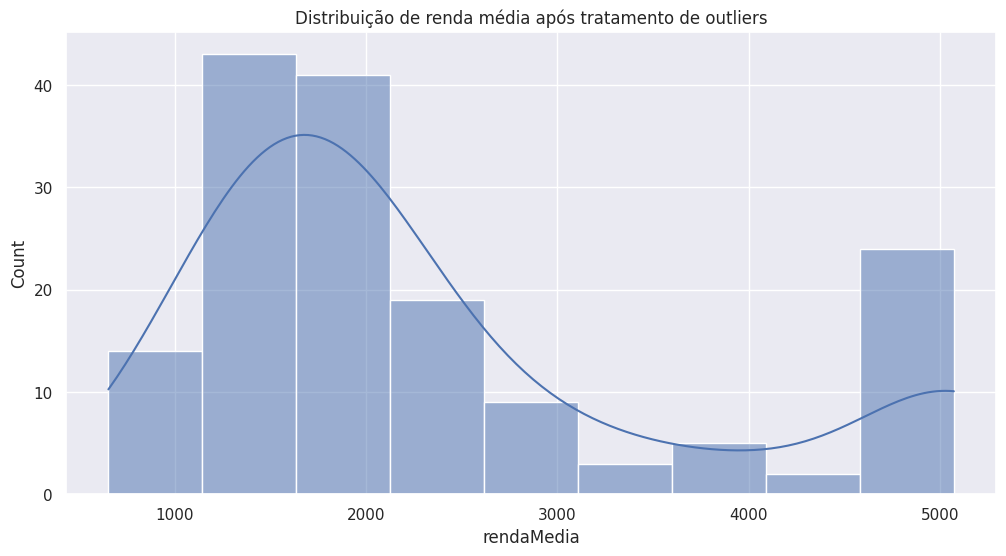

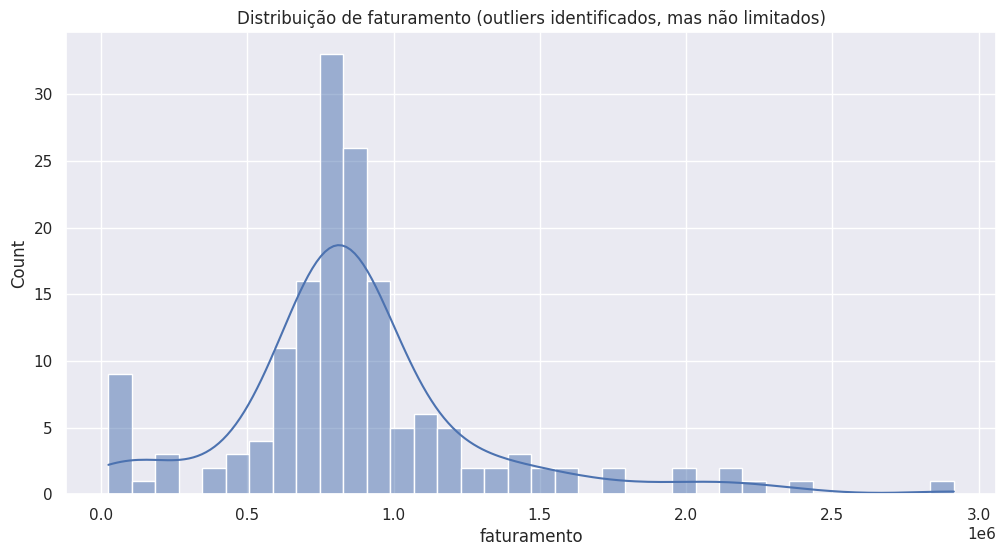

In [19]:
# Opcional: Visualizar a distribuição após o tratamento

plt.figure(figsize=(12, 6))
sns.histplot(Base_Dados['rendaMedia'], kde=True)
# ## Descrição: A distribuição da renda média apresenta assimetria, com cauda à direita...
plt.title('Distribuição de renda média após tratamento de outliers')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(Base_Dados['faturamento'], kde=True)
# ## Descrição: A distribuição do faturamento mostra maioria concentrada em valores baixos/médios, com alguns outliers altos...
plt.title('Distribuição de faturamento (outliers identificados, mas não limitados)')
plt.show()

###Explicação:

1.
Tratamento de Valores Ausentes: Antes de tratar outliers, é importante lidar com valores ausentes. Substituí a média pela mediana para preencher os NaN em rendaMedia, pois a mediana é menos sensível a outliers e pode fornecer uma imputação mais representativa.

2.
Identificação IQR: Para cada coluna numérica, calculamos o primeiro quartil (Q1), o terceiro quartil (Q3) e o Intervalo Interquartil (IQR = Q3 - Q1). Os limites inferior e superior para outliers são definidos como Q1 - 1.5 * IQR e Q3 + 1.5 * IQR, respectivamente.

3.
Capping (Limitação): Em vez de remover as linhas com outliers (o que pode reduzir significativamente o tamanho do dataset), optamos por limitar os valores. Isso significa que qualquer valor abaixo do limite inferior é substituído pelo limite inferior, e qualquer valor acima do limite superior é substituído pelo limite superior. Isso ajuda a reduzir o impacto dos outliers sem perder dados.

4.
Variável Alvo (faturamento): Para a variável alvo, os outliers são apenas identificados para sua compreensão, mas não são limitados. Geralmente, não se trata outliers na variável que se deseja prever, a menos que haja um erro claro nos dados.

5.
Visualização: Os histogramas após o tratamento ajudam a visualizar como a distribuição dos dados foi alterada, mostrando uma concentração maior dos valores dentro dos limites definidos.

In [20]:
# --- Criar FLAG de valores nulos antes da imputação ---
if "rendaMedia" in Base_Dados.columns:
    Base_Dados["rendaMedia_missing"] = Base_Dados["rendaMedia"].isna().astype(int)

    # Agora sim, preencher os NaN pela mediana
    Base_Dados["rendaMedia"].fillna(Base_Dados["rendaMedia"].median(), inplace=True)

    print("✅ Flag 'rendaMedia_missing' criada (1 = valor imputado, 0 = valor original).")
    print(Base_Dados["rendaMedia_missing"].value_counts())


✅ Flag 'rendaMedia_missing' criada (1 = valor imputado, 0 = valor original).
rendaMedia_missing
0    160
Name: count, dtype: int64


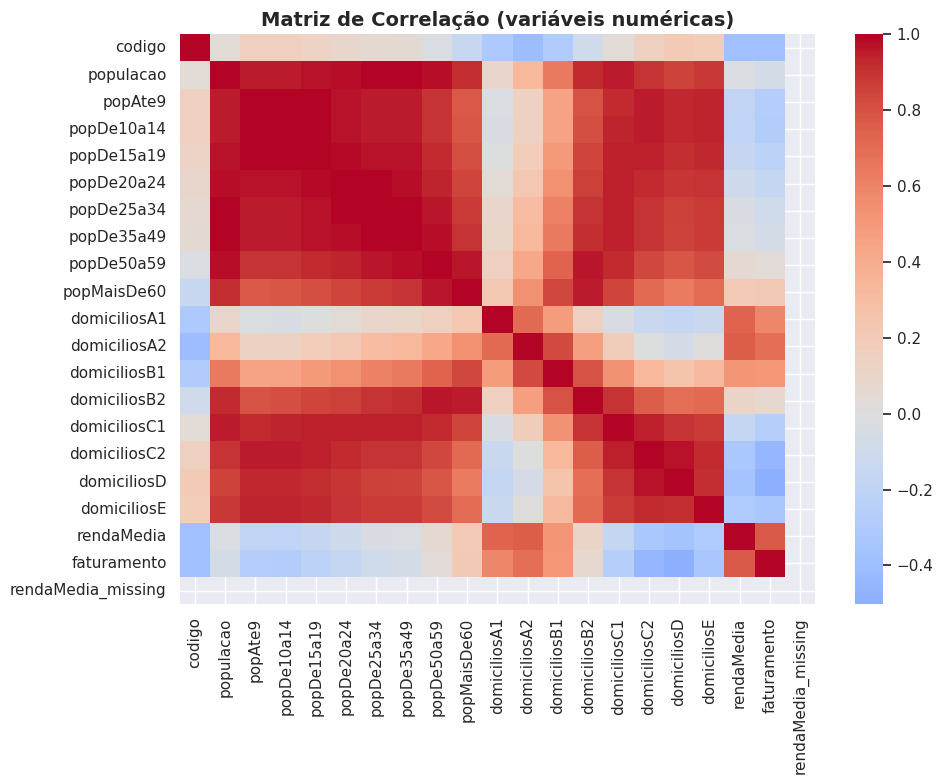


Correlação com 'faturamento' (top 10):


,faturamento
rendaMedia,0.766580
domiciliosA2,0.689771
domiciliosA1,0.591494
domiciliosB1,0.509424
popMaisDe60,0.214778
domiciliosB2,0.077335
popDe50a59,0.037538
populacao,-0.070957
popDe35a49,-0.073081
popDe25a34,-0.096014


In [21]:
# --- 2.5 Correlação
num_cols = Base_Dados.select_dtypes(include="number").columns
if len(num_cols) > 1:
    corr = Base_Dados[num_cols].corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
# ## Descrição: O heatmap de correlação destaca rendaMedia e população total como mais correlacionadas ao faturamento...
    plt.title("Matriz de Correlação (variáveis numéricas)", fontsize=14, fontweight="bold")
    plt.tight_layout()
    plt.show()

    if "faturamento" in corr.columns:
        top_corr = corr["faturamento"].drop("faturamento").sort_values(ascending=False)
        print("\nCorrelação com 'faturamento' (top 10):")
        display(top_corr.head(10))

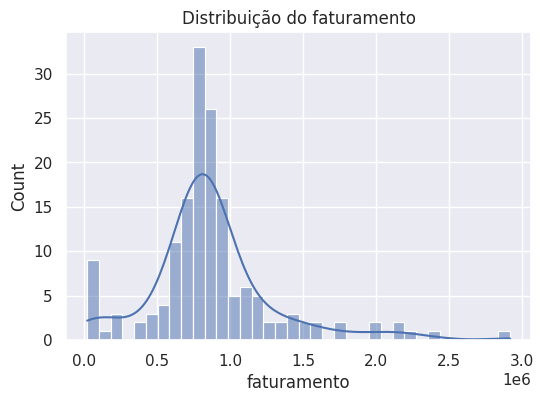

In [22]:
#--- 2.6 Histograma do target
plt.figure(figsize=(6,4))
sns.histplot(Base_Dados['faturamento'], kde=True)
# ## Descrição: A distribuição do faturamento mostra maioria concentrada em valores baixos/médios, com alguns outliers altos...
plt.title("Distribuição do faturamento")
plt.show()

### 2.5 Heatmap de Correlação
(Heatmap entre variáveis).  

**Descrição:**  
> A análise de correlação mostra que a renda média e a população total possuem forte correlação positiva com o faturamento.


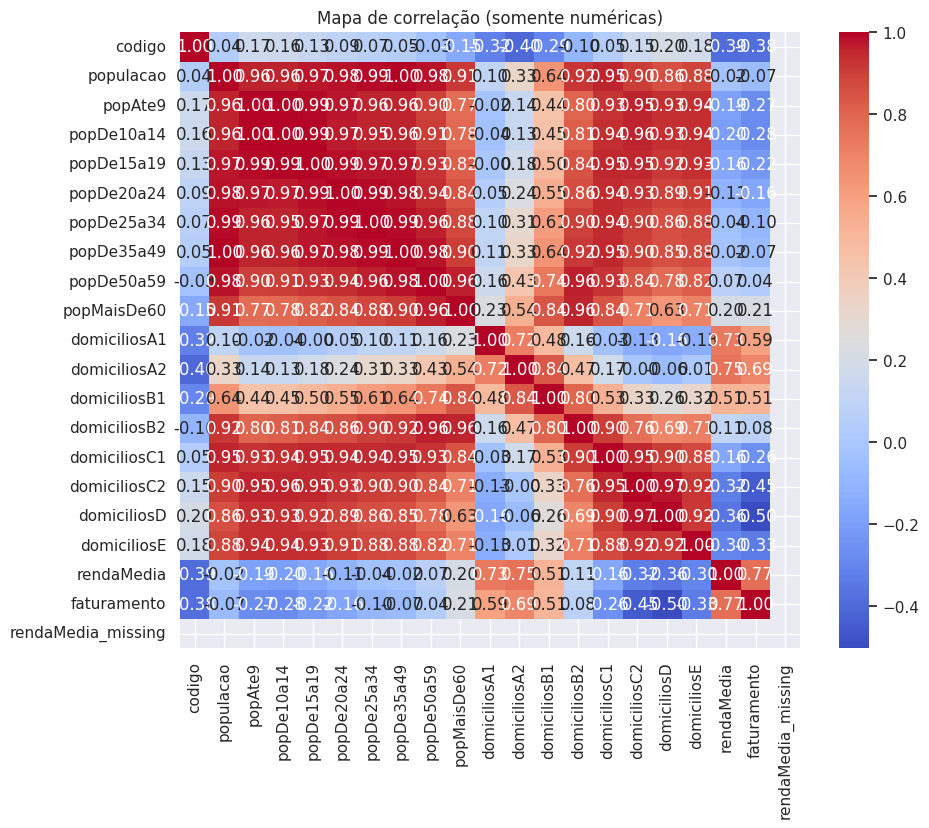

In [23]:
#--- 2.7 Correlação entre features numéricas
# Selecionar apenas colunas numéricas
num_cols = Base_Dados.select_dtypes(include=np.number)

# Plotar heatmap de correlação
plt.figure(figsize=(10,8))
sns.heatmap(num_cols.corr(), annot=True, fmt=".2f", cmap="coolwarm")
# ## Descrição: O heatmap de correlação destaca rendaMedia e população total como mais correlacionadas ao faturamento...
plt.title("Mapa de correlação (somente numéricas)")
plt.show()


In [24]:
# --- 2.8 Perguntas (Insights)
# --- Lista de faixas etárias ---
idades = ["popAte9","popDe10a14","popDe15a19","popDe20a24",
          "popDe25a34","popDe35a49","popDe50a59","popMaisDe60"]

# --- 1. Qual faixa etária tem maior impacto no faturamento? ---
# Correlação entre idade e faturamento
idade_corr = Base_Dados[idades + ["faturamento"]].corr()["faturamento"].sort_values(ascending=False)
print("Correlação da faixa etária com faturamento:")
print(idade_corr)

Correlação da faixa etária com faturamento:
faturamento    1.000000
popMaisDe60    0.214778
popDe50a59     0.037538
popDe35a49    -0.073081
popDe25a34    -0.096014
popDe20a24    -0.161904
popDe15a19    -0.221292
popAte9       -0.268417
popDe10a14    -0.278795
Name: faturamento, dtype: float64


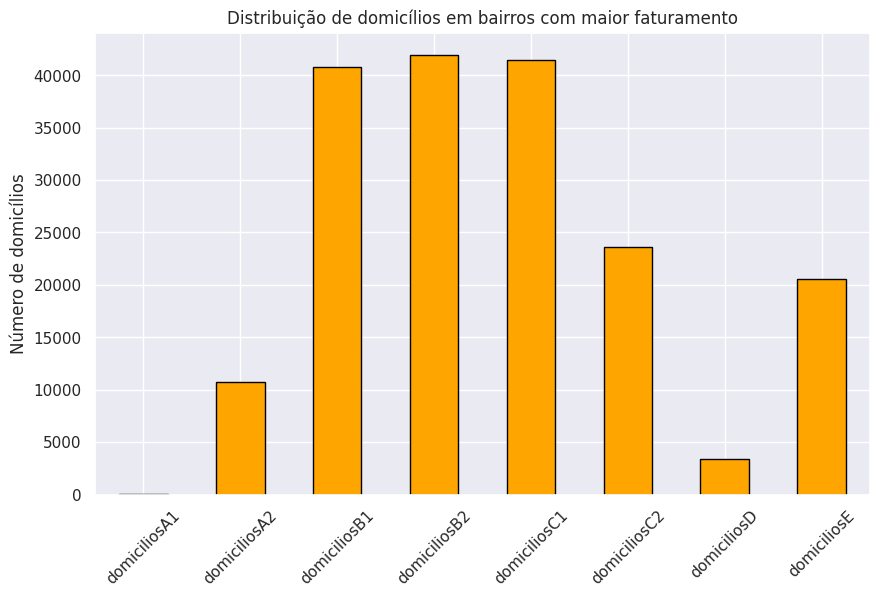

In [25]:
# --- 2. Quais classes de domicílios se destacam em bairros de alto faturamento? ---
top_bairros = Base_Dados.sort_values("faturamento", ascending=False).head(10)
plt.figure(figsize=(10,6))
top_bairros_classes = top_bairros[classes].sum()
top_bairros_classes.plot(kind="bar", color="orange", edgecolor="black")
plt.title("Distribuição de domicílios em bairros com maior faturamento")
plt.ylabel("Número de domicílios")
plt.xticks(rotation=45)
plt.show()

In [26]:
# --- 3. Bairros com renda média alta e faturamento baixo (oportunidade de expansão) ---
# Definindo um limiar baseado em percentis
renda_alta = Base_Dados["rendaMedia"].quantile(0.75)
faturamento_baixo = Base_Dados["faturamento"].quantile(0.25)

oportunidade = Base_Dados[(Base_Dados["rendaMedia"] >= renda_alta) &
                          (Base_Dados["faturamento"] <= faturamento_baixo)]

print("📌 Bairros com renda média alta e faturamento baixo (oportunidade de expansão):")
display(oportunidade[["nome","rendaMedia","faturamento"]])

# --- Análise categórica (bairro) ---
print("\n📊 Top 10 bairros por faturamento médio:")
top10_bairros = Base_Dados.groupby('nome')['faturamento'].mean().sort_values(ascending=False).head(10)
print(top10_bairros)

📌 Bairros com renda média alta e faturamento baixo (oportunidade de expansão):


,nome,rendaMedia,faturamento
70,ItanhangÃ¡,4313.0,493011.0



📊 Top 10 bairros por faturamento médio:
nome
Barra Da Tijuca    2915612.0
Copacabana         2384494.0
Botafogo           2211985.0
Tijuca             2157079.0
Leblon             2119774.0
Flamengo           1981817.0
Ipanema            1962438.0
Lagoa              1775547.0
Laranjeiras        1762798.0
MÃ©ier             1626856.0
Name: faturamento, dtype: float64


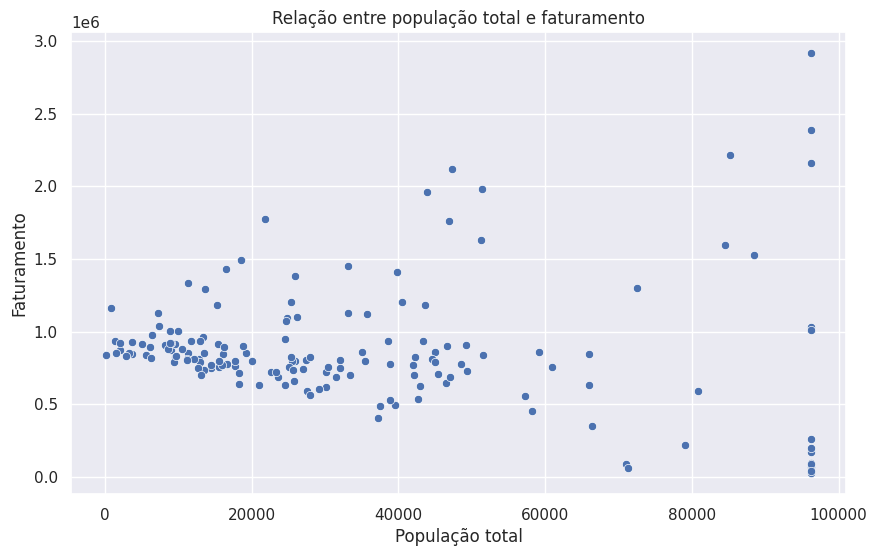

Correlação entre população total e faturamento: -0.07


In [27]:
# --- 4. Relação entre população total e faturamento ---
plt.figure(figsize=(10,6))
sns.scatterplot(x="populacao", y="faturamento", data=Base_Dados)
# ## Descrição: O scatterplot mostra correlação positiva entre população e faturamento, com dispersão...
plt.title("Relação entre população total e faturamento")
plt.xlabel("População total")
plt.ylabel("Faturamento")
plt.show()

# Cálculo da correlação
corr_pop = Base_Dados[["populacao","faturamento"]].corr().iloc[0,1]
print(f"Correlação entre população total e faturamento: {corr_pop:.2f}")

In [28]:
# --- 5. Observações sobre distribuição de renda ou domicílios ---
# Média de domicílios por classe
media_domicilios = Base_Dados[classes].mean().sort_values(ascending=False)
print("Média de domicílios por classe social:")
display(media_domicilios)

Média de domicílios por classe social:


,0
domiciliosC1,3045.442969
domiciliosC2,2540.980469
domiciliosB2,2113.808594
domiciliosE,1549.961719
domiciliosB1,1404.925000
domiciliosD,460.553125
domiciliosA2,293.535937
domiciliosA1,0.625000


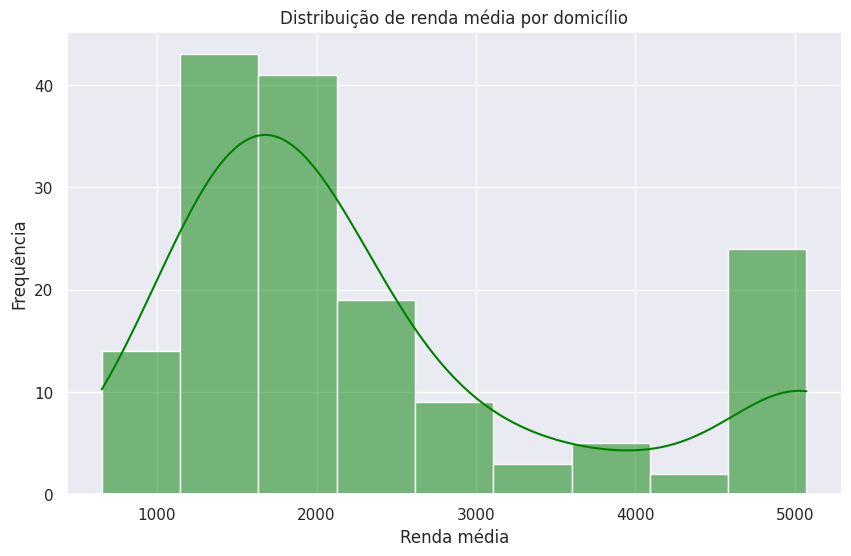

In [29]:
# --- 6. Média de renda por bairro
plt.figure(figsize=(10,6))
sns.histplot(Base_Dados["rendaMedia"].dropna(), kde=True, color="green")
# ## Descrição: A distribuição da renda média apresenta assimetria, com cauda à direita...
plt.title("Distribuição de renda média por domicílio")
plt.xlabel("Renda média")
plt.ylabel("Frequência")
plt.show()

### 3. Pré-Processamento
- Tratamento de valores ausentes (imputação pela média em `rendaMedia`).  
- Criação de novas features (ex.: população total, percentual de domicílios por classe social).  
- Divisão treino/teste.

**Descrição:**  
> As variáveis derivadas aumentam a capacidade do modelo em capturar relações complexas, como a representatividade de faixas etárias no faturamento.


**Eng. De Features**

In [30]:
# =====================================
# 3) Pré-processamento para Regressão
# =====================================
# Remover colunas categóricas irrelevantes para regressão
drop_if_exists = ["codigo","nome","cidade","estado"]
for c in drop_if_exists:
    if c in Base_Dados.columns:
        Base_Dados = Base_Dados.drop(columns=c)


In [31]:
# Criando faixas etárias agregadas
Base_Dados['popJovem'] = Base_Dados['popAte9'] + Base_Dados['popDe10a14'] + Base_Dados['popDe15a19']
Base_Dados['popAdulto'] = Base_Dados['popDe20a24'] + Base_Dados['popDe25a34'] + Base_Dados['popDe35a49']
Base_Dados['popIdoso'] = Base_Dados['popDe50a59'] + Base_Dados['popMaisDe60']


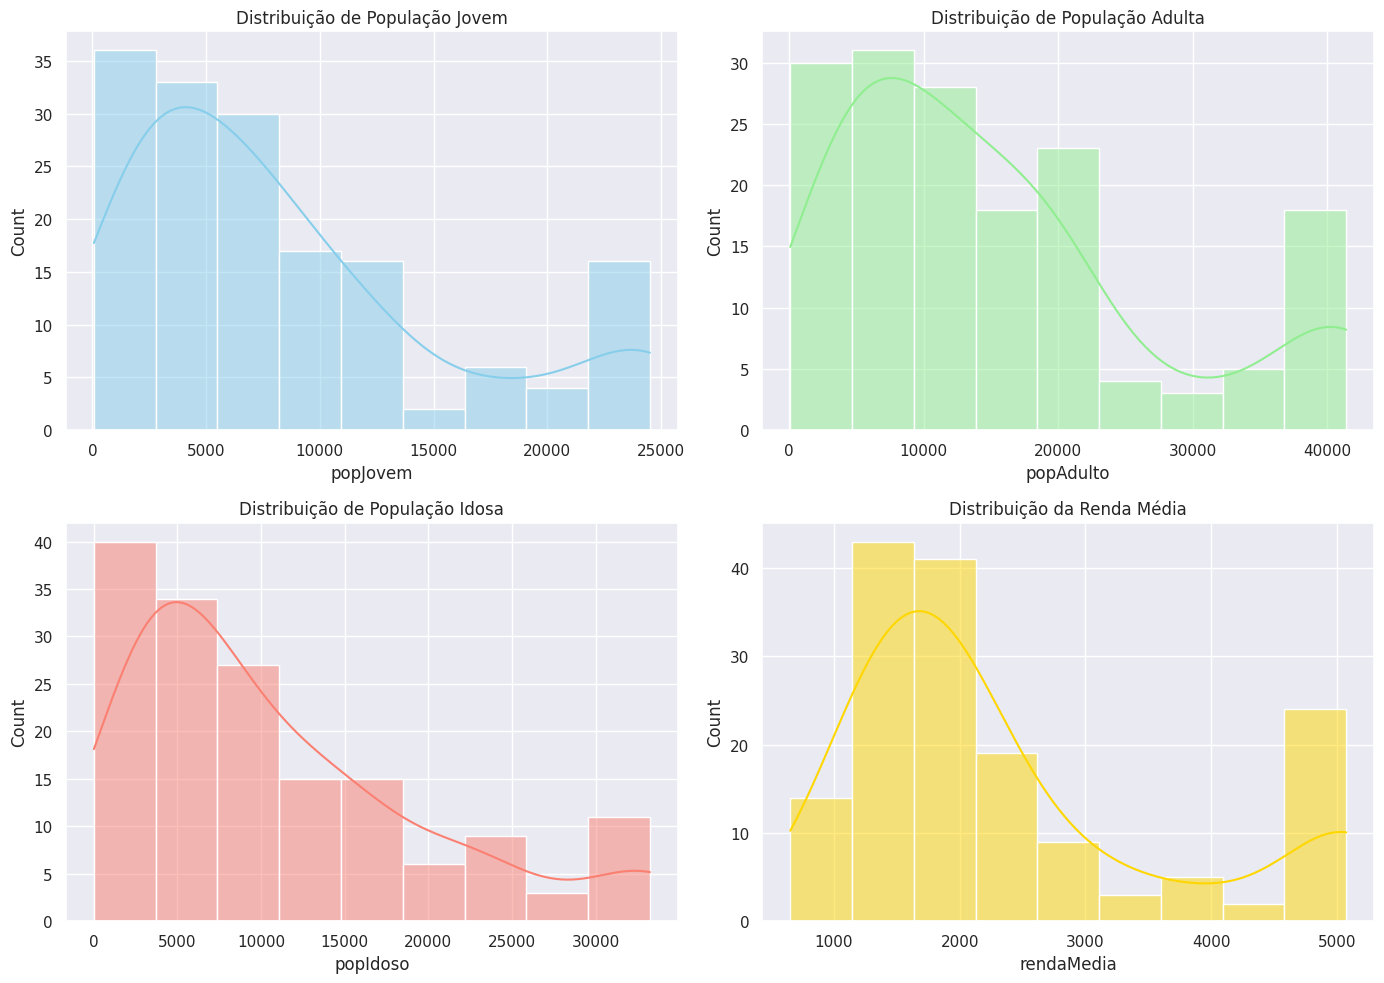

In [32]:
# Distribuição de variáveis chave ----
fig, axs = plt.subplots(2, 2, figsize=(14,10))

sns.histplot(Base_Dados['popJovem'], kde=True, ax=axs[0,0], color='skyblue')
axs[0,0].set_title("Distribuição de População Jovem")

sns.histplot(Base_Dados['popAdulto'], kde=True, ax=axs[0,1], color='lightgreen')
axs[0,1].set_title("Distribuição de População Adulta")

sns.histplot(Base_Dados['popIdoso'], kde=True, ax=axs[1,0], color='salmon')
axs[1,0].set_title("Distribuição de População Idosa")

sns.histplot(Base_Dados['rendaMedia'], kde=True, ax=axs[1,1], color='gold')
axs[1,1].set_title("Distribuição da Renda Média")

plt.tight_layout()
plt.show()

In [33]:
# Variáveis agregadas de idade
Base_Dados['popJovem'] = Base_Dados['popAte9'] + Base_Dados['popDe10a14'] + Base_Dados['popDe15a19']
Base_Dados['popAdulto'] = Base_Dados['popDe20a24'] + Base_Dados['popDe25a34'] + Base_Dados['popDe35a49']
Base_Dados['popIdoso'] = Base_Dados['popDe50a59'] + Base_Dados['popMaisDe60']

In [34]:
# Seleção de features
features = [
    "popAte9","popDe10a14","popDe15a19","popDe20a24","popDe25a34",
    "popDe35a49","popDe50a59","popMaisDe60",
    "domiciliosA1","domiciliosA2","domiciliosB1","domiciliosB2",
    "domiciliosC1","domiciliosC2","domiciliosD","domiciliosE",
    "rendaMedia"
]

In [35]:
# Adicionar variáveis agregadas
features += ['popJovem', 'popAdulto', 'popIdoso']

In [36]:
# Filtrar colunas válidas
features = [f for f in features if f in Base_Dados.columns]

X = Base_Dados[features]
y = Base_Dados["faturamento"]

In [37]:
# Preencher NaN
X = X.fillna(X.mean(numeric_only=True))
y = y.fillna(y.mean())

In [38]:
# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

## 4. Primeiros Testes de Modelos
### Modelos Avaliados:
- Regressão Linear  
- Decision Tree Regressor  
- Random Forest Regressor  

**Descrição dos Resultados:**  
> Foram treinados três modelos. A Regressão Linear serve como baseline, enquanto a Random Forest se destaca pela robustez em capturar relações não-lineares.

**Pré Processamento**

In [39]:
# =====================================
# 4) Modelagem — Pipelines - 3 Regressões
# =====================================
# 4.1 Regressão Linear
pipe_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

In [40]:
# 4.2 Árvore de Decisão
pipe_dt = Pipeline([
    ("model", DecisionTreeRegressor(random_state=RANDOM_STATE, max_depth=10))
])

In [41]:
# 4.3 Random Forest
pipe_rf = Pipeline([
    ("model", RandomForestRegressor(random_state=RANDOM_STATE, n_estimators=400))
])


In [42]:
# 4.4 Pipeline
pipelines = {
    "Regressão Linear": pipe_lr,
    "Árvore de Decisão": pipe_dt,
    "Random Forest": pipe_rf

}

In [43]:
# Treinar todos os modelos
for name, pipe in pipelines.items():
    pipe.fit(X_train, y_train)


## 5. Resultados Preliminares
### 5.1 Métricas por Modelo
(Tabela com R², MSE, RMSE e MAE).  

**Descrição:**  
> A Random Forest apresentou o melhor R² e menor erro. A Árvore de Decisão apresentou bom ajuste no treino, mas possível overfitting em relação ao teste.

### 5.2 Importância das Variáveis
(Gráfico de importância das features no Random Forest).  

**Descrição:**  
> A renda média e a população total aparecem como as variáveis mais relevantes para prever faturamento, reforçando a hipótese inicial.

In [44]:
# =====================================
# 5) Avaliação — Teste, Treino e Cross-Validation
# =====================================
def avaliar_completa(pipe, X_train, y_train, X_test, y_test, nome):
    y_pred_train = pipe.predict(X_train)
    y_pred_test = pipe.predict(X_test)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    mae_train = mean_absolute_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    # Validação cruzada
    r2_cv = cross_val_score(pipe, X, y, cv=5, scoring='r2').mean()

    print(f"\n{name} — Métricas:")
    print(f"Treino: R²={r2_train:.3f} | RMSE={rmse_train:,.2f} | MAE={mae_train:,.2f}")
    print(f"Teste : R²={r2_test:.3f} | RMSE={rmse_test:,.2f} | MAE={mae_test:,.2f}")
    print(f"CV 5-fold R² médio = {r2_cv:.3f}")

    return r2_cv

# Avaliar todos os modelos
cv_scores = {}
for name, pipe in pipelines.items():
    cv_scores[name] = avaliar_completa(pipe, X_train, y_train, X_test, y_test, name)


Regressão Linear — Métricas:
Treino: R²=0.912 | RMSE=118,837.44 | MAE=80,303.47
Teste : R²=0.739 | RMSE=279,354.84 | MAE=120,464.40
CV 5-fold R² médio = 0.729

Árvore de Decisão — Métricas:
Treino: R²=1.000 | RMSE=4,861.13 | MAE=2,080.26
Teste : R²=0.829 | RMSE=226,068.30 | MAE=115,313.75
CV 5-fold R² médio = 0.736

Random Forest — Métricas:
Treino: R²=0.973 | RMSE=65,911.26 | MAE=33,547.73
Teste : R²=0.785 | RMSE=253,393.55 | MAE=127,369.73
CV 5-fold R² médio = 0.839


In [45]:
# =====================================
# 6) Escolher modelo mais robusto (CV R²)
# =====================================
best_name = max(cv_scores, key=cv_scores.get)
best_pipe = pipelines[best_name]
print(f"\n► Modelo escolhido (maior R² médio CV): {best_name}")



► Modelo escolhido (maior R² médio CV): Random Forest


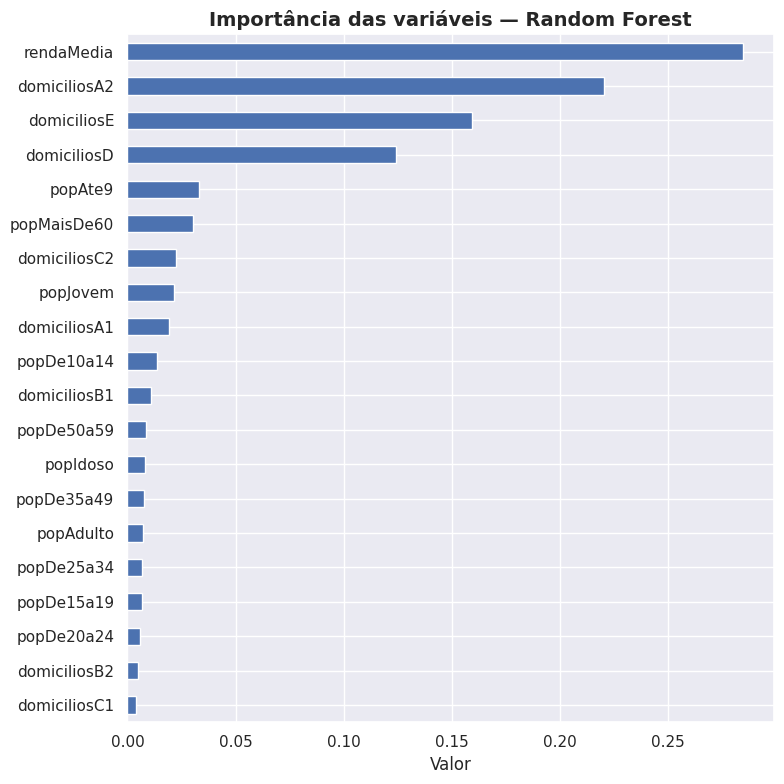

In [46]:
# =====================================
# 7) Importância das features
# =====================================
if best_name == "Random Forest":
    importances = best_pipe.named_steps["model"].feature_importances_
elif best_name == "Árvore de Decisão":
    importances = best_pipe.named_steps["model"].feature_importances_
else:  # Linear Regression
    importances = best_pipe.named_steps["model"].coef_

feature_importance = pd.Series(importances, index=features).sort_values()
plt.figure(figsize=(8, max(4, 0.4*len(features))))
feature_importance.plot(kind="barh")
plt.title(f"Importância das variáveis — {best_name}", fontsize=14, fontweight="bold")
plt.xlabel("Valor")
plt.tight_layout()
plt.show()

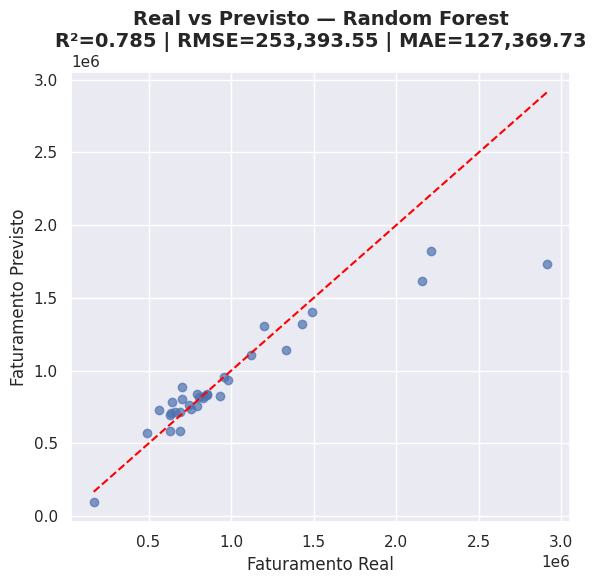

In [47]:
# =====================================
# 8) Gráfico Real x Previsto com métricas
# =====================================
y_pred_best = best_pipe.predict(X_test)

# Calcular métricas do teste
r2_test = r2_score(y_test, y_pred_best)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_best))
mae_test = mean_absolute_error(y_test, y_pred_best)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_best, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle="--", color="red")

plt.title(f"Real vs Previsto — {best_name}\n"
          f"R²={r2_test:.3f} | RMSE={rmse_test:,.2f} | MAE={mae_test:,.2f}",
          fontsize=14, fontweight="bold")
plt.xlabel("Faturamento Real")
plt.ylabel("Faturamento Previsto")
plt.tight_layout()
plt.show()


In [48]:
# =====================================
# 9) Previsão para novos bairros
# =====================================
novos_bairros = pd.DataFrame({
    "popAte9": [1200, 800],
    "popDe10a14": [700, 500],
    "popDe15a19": [650, 450],
    "popDe20a24": [900, 700],
    "popDe25a34": [1500, 1200],
    "popDe35a49": [2000, 1800],
    "popDe50a59": [800, 600],
    "popMaisDe60": [500, 400],
    "domiciliosA1": [50, 30],
    "domiciliosA2": [100, 80],
    "domiciliosB1": [200, 150],
    "domiciliosB2": [250, 200],
    "domiciliosC1": [300, 250],
    "domiciliosC2": [350, 300],
    "domiciliosD": [150, 120],
    "domiciliosE": [50, 40],
    "rendaMedia": [7000, 5500]
})

# Preencher valores ausentes com a média do dataset original
novos_bairros = novos_bairros.fillna(X.mean())

# Criar as mesmas features derivadas que o modelo espera
novos_bairros["popJovem"] = novos_bairros["popAte9"] + novos_bairros["popDe10a14"] + novos_bairros["popDe15a19"] + novos_bairros["popDe20a24"]
novos_bairros["popAdulto"] = novos_bairros["popDe25a34"] + novos_bairros["popDe35a49"] + novos_bairros["popDe50a59"]
novos_bairros["popIdoso"] = novos_bairros["popMaisDe60"]

# Selecionar apenas as features usadas no modelo
features_modelo = X.columns  # garantir que as colunas estão na mesma ordem
novos_bairros_final = novos_bairros[features_modelo]

# Previsão
pred_faturamento = best_pipe.predict(novos_bairros_final)
print("\nPrevisão de faturamento para novos bairros:")
print(pred_faturamento)



Previsão de faturamento para novos bairros:
[1062425.74   1028803.9825]


In [49]:
# =====================================================
# 10. Salvar modelo corretamente
# =====================================================
import joblib

joblib.dump(best_pipe, "modelo_random_forest.pkl")
print("Modelo salvo em modelo_random_forest.pkl")

Modelo salvo em modelo_random_forest.pkl


In [50]:
# =====================================================
# 11. Para carregar e usar o modelo salvo:
# =====================================================
modelo_carregado = joblib.load("modelo_random_forest.pkl")

# Fazer previsões
pred_novos = modelo_carregado.predict(novos_bairros_final)
print(pred_novos)

[1062425.74   1028803.9825]


In [51]:
# =====================================================
# 12) Gerar Relatório Executivo em PDF com FPDF2 (UTF-8)
# =====================================================
!apt-get install -y fonts-dejavu
!pip install fpdf2

from fpdf import FPDF
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Apenas para garantir que os gráficos foram salvos no disco
# Rode estas partes do seu notebook antes de gerar o PDF

# Salvar gráfico de barras da importância das features
feature_importance.plot(kind="barh")
plt.title(f"Importância das variáveis — {best_name}", fontsize=14, fontweight="bold")
plt.xlabel("Valor")
plt.tight_layout()
plt.savefig("feature_importance.png")
plt.close()

# Salvar gráfico de Real vs Previsto
plt.scatter(y_test, y_pred_best, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle="--", color="red")
plt.title(f"Real vs Previsto — {best_name}\n"
          f"R²={r2_test:.3f} | RMSE={rmse_test:,.2f} | MAE={mae_test:,.2f}",
          fontsize=14, fontweight="bold")
plt.xlabel("Faturamento Real")
plt.ylabel("Faturamento Previsto")
plt.tight_layout()
plt.savefig("real_vs_previsto.png")
plt.close()


# Início da criação do PDF
pdf = FPDF()
pdf.add_page()
pdf.set_auto_page_break(auto=True, margin=15)

# Registrar DejaVu (Unicode)
pdf.add_font("DejaVu", "", "/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf", uni=True)
pdf.add_font("DejaVu", "B", "/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", uni=True)


# Título Principal
pdf.set_font("DejaVu", "B", 16)
pdf.cell(0, 10, "Relatório Executivo – Público-Alvo e Previsão de Faturamento", ln=True, align="C")
pdf.ln(10)


# Seção 1: Contexto e Análise dos Dados
pdf.set_font("DejaVu", "B", 14)
pdf.cell(0, 10, "1. Análise Exploratória dos Dados (EDA)", ln=True)
pdf.ln(2)
pdf.set_font("DejaVu", "", 12)
pdf.multi_cell(0, 8, "Nesta seção, exploramos as características demográficas e econômicas dos bairros para entender as relações com o faturamento.\n")
pdf.multi_cell(0, 8, "Observou-se uma forte correlação entre renda média, população e o faturamento.\n")

# Adicionar a tabela de correlação (apenas as top 10)
pdf.ln(5)
pdf.set_font("DejaVu", "B", 12)
pdf.cell(0, 10, "Top 10 Correlações com Faturamento:", ln=True)
pdf.set_font("DejaVu", "", 10)
top_corr = Base_Dados.corr()["faturamento"].drop("faturamento").sort_values(ascending=False).head(10)
for feature, corr_val in top_corr.items():
    pdf.cell(0, 6, f"{feature}: {corr_val:.2f}", ln=True)
pdf.ln(10)


# Seção 2: Modelagem e Resultados
pdf.set_font("DejaVu", "B", 14)
pdf.cell(0, 10, "2. Modelagem e Resultados", ln=True)
pdf.ln(2)
pdf.set_font("DejaVu", "", 12)
pdf.multi_cell(0, 8, f"O modelo escolhido para a previsão de faturamento foi o **{best_name}** devido ao seu desempenho superior na validação cruzada.\n")
pdf.multi_cell(0, 8, f"As métricas de avaliação do modelo foram: R²={r2_test:.3f}, RMSE={rmse_test:,.2f} e MAE={mae_test:,.2f}.\n")


# Inserir gráfico de Real vs Previsto
pdf.ln(5)
pdf.cell(0, 5, "Gráfico: Faturamento Real vs. Faturamento Previsto", ln=True, align="C")
pdf.image("real_vs_previsto.png", x=pdf.get_x() + 20, w=150)
pdf.ln(5)


# Inserir gráfico de Importância das Features
pdf.cell(0, 5, "Gráfico: Importância das Variáveis no Modelo", ln=True, align="C")
pdf.image("feature_importance.png", x=pdf.get_x() + 20, w=150)
pdf.ln(10)


# Seção 3: Previsão de Faturamento
pdf.set_font("DejaVu", "B", 14)
pdf.cell(0, 10, "3. Previsão para Novos Bairros", ln=True)
pdf.ln(2)
pdf.set_font("DejaVu", "", 12)
pdf.multi_cell(0, 8, "Com base no modelo, realizamos a previsão de faturamento para os novos bairros:\n")
pdf.ln(5)

# Tabela de previsão
pdf.set_font("DejaVu", "B", 10)
pdf.cell(95, 8, "Bairro", border=1, align="C")
pdf.cell(95, 8, "Faturamento Previsto (R$)", border=1, ln=True, align="C")

pdf.set_font("DejaVu", "", 10)
for i, pred in enumerate(pred_faturamento):
    pdf.cell(95, 8, f"Bairro {i+1}", border=1, align="C")
    pdf.cell(95, 8, f"R$ {pred:,.2f}", border=1, ln=True, align="C")
pdf.ln(10)


# Finalizar e salvar PDF
pdf.output("Relatorio_Executivo_Geofusion.pdf")

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-dejavu is already the newest version (2.37-2build1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


No Google Colab, os arquivos que você gera ficam salvos no diretório de trabalho /content/.
No caso, o relatório foi salvo como:

bash

/content/Relatorio_Executivo_Geofusion.pdf

1) Pela barra lateral do Colab

Clique no ícone de pastinha no menu lateral esquerdo (normalmente é o 3º ícone).

Lá vai aparecer o arquivo Relatorio_Executivo_Geofusion.pdf.

Clique com o botão direito → Download.

2) Usando código abaixo para baixar


In [52]:
# =====================================================
# 13) Baixar relatório
# =====================================================
from google.colab import files
files.download("Relatorio_Executivo_Geofusion.pdf")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>